## ECE 351 - Lab #3
#### Collin Heist, Discrete Covolution

## Introduction
The purpose of this lab is to become more familiar with convolution, and practice implementing convolution with Python. We'll be comparing our own convolution function with the SciPy package's convolution function to see how they compare. This allows for quick de-bugging of our own implementation.

In [2]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import warnings
warnings.filterwarnings("ignore")

# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray"]

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1):
    plt.figure(figsize=(20, 16), dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()

The functions shown below are my defintions of the ramp and ramp function that are used to create the other functions for this lab.

In [3]:
# Definition of the ramp function
def r(x_vals, zero_val=0):
    return (np.asarray([0 if x < zero_val else (x - zero_val) for x in x_vals]))

# Defintion of the step function
def u(x_vals, zero_val=0):
    return (np.asarray([0 if x < zero_val else 1 for x in x_vals]))

## Part 1
The below functions, `f_1`, `f_2`, and `f_3` are my own definitions for the functions provided in the lab handout. They're made up of components of the step and ramp functions defined above.

In [4]:
# Signal Functions f_1 to f_3
def f_1(x_vals):
    return (u(x_vals, 2) - u(x_vals, 9))

def f_2(x_vals):
    return (np.exp(-1 * x_vals) * u(x_vals))

def f_3(x_vals):
    return (r(x_vals, 2) * (u(x_vals, 2) - u(x_vals, 3)) + 
            r(-1 * x_vals, -4) * (u(x_vals, 3) - u(x_vals, 4)))

In [ ]:
step_size = 0.01
t = np.arange(0, 20 + step_size, step_size)
y1 = f_1(t)
y2 = f_2(t)
y3 = f_3(t)

create_plot([t, t, t], [(y1, ), (y2, ), (y3, )], ['t', 't', 't'],
            ["f1(t)", "f2(t)", "f3(t)"],
            [("$f_1(t)$", ), ("$f_2(t)$", ), ("$f_3(t)$", )], 3)

## Part 2
The convolution function I'll be implementing is:
$$x(t) * h(t) = \int_{0}^{t} x(\tau)\cdot h(t-\tau)d\tau$$
Rather than implementing an integration, I'll be using the following summation:
$$x[n] * h[n] = \sum_{k=-\infty}^{\infty} h[k]\cdot x[n-k]$$

In [49]:
# Function to perform the convolution of x(t) and h(t)
def conv(x, h, x_range):
    # To convolve the two, the vector needs to be twice as long
    conv = np.zeros(np.size(x) + np.size(h) - 1)
    
    # Double-iterate over the two functions, calculating the cumulative sum
    for a in range(np.size(x)):
        for b in range(np.size(h)):
            conv[a + b] = conv[a + b] + x[a] * h[b]
            
    conv = [val / x_range for val in conv] # Scale down to size
    return conv

# The x-values for the convolution need to have half the original step size
# conv_t = np.arange(0, 20 + step_size / 2, step_size / 2)
# # Plot my Convolution and the sig.convolution on the same graph
# create_plot([conv_t, conv_t, conv_t],
#             [(conv(y1, y2)[:-2], sig.convolve(y1, y2)[:-2]),
#              (conv(y2, y3)[:-2], sig.convolve(y2, y3)[:-2]),
#              (conv(y1, y3)[:-2], sig.convolve(y1, y3)[:-2])],
#             ['t', 't', 't'],
#             ['f_1(t) * f_2(t)', 'f_2(t) * f_3(t)', 'f_1(t) * f_3(t)'],
#             [('$f_1(t) * f_2(t)$', 'Actual $f_1(t) * f_2(t)$'),
#              ('$f_2(t) * f_3(t)$', 'Actual $f_2(t) * f_3(t)$'),
#              ('$f_1(t) * f_3(t)$', 'Actual $f_1(t) * f_3(t)$')], 3)

## Questions
1. I did this lab alone, although I did use Google to answer some questions regarding numpy and such. 
2. By far the most difficult part of this lab was figuring out how to implement the convolution. This was because almost all resources I found online were about convolutional neural networks (unrelated), or about using pre-built functions like numpy and scipy's convolve functions. Assuming those were 'off-limits', this meant a majority of available resources were largely useless. I eventually figured it out by going through the source code of some of the Python mathematics packages to see how they implemented them.
3. I did not. I found that type of approach largely useless, at least from a programmatic standpoint. Logically, that kind of intuition is useful for understanding what a convolution _is_, but not at all helpful for implementing it (at least to me).
4. The line about using `scipy.signal.convolve()` to verify our code was not very clear. I think this is primarily due to its placement in the task list. Being listed first makes me think it must somehow relate to our own version of convolution, when in fact it should be used to verify the functions that come later in the list. A more clear placement for this would be task 6. Additionally, I think the 'well-labeled' attribute is far too subjective. 

## Conclusion
This lab was _very_ interesting. The task of implementing the convolution by ourselves was far more challenging than I would have susepcted. In addition, being able to create our own functions and then see what their convolution would equate to is very insightful, and no doubt will be useful in the future.

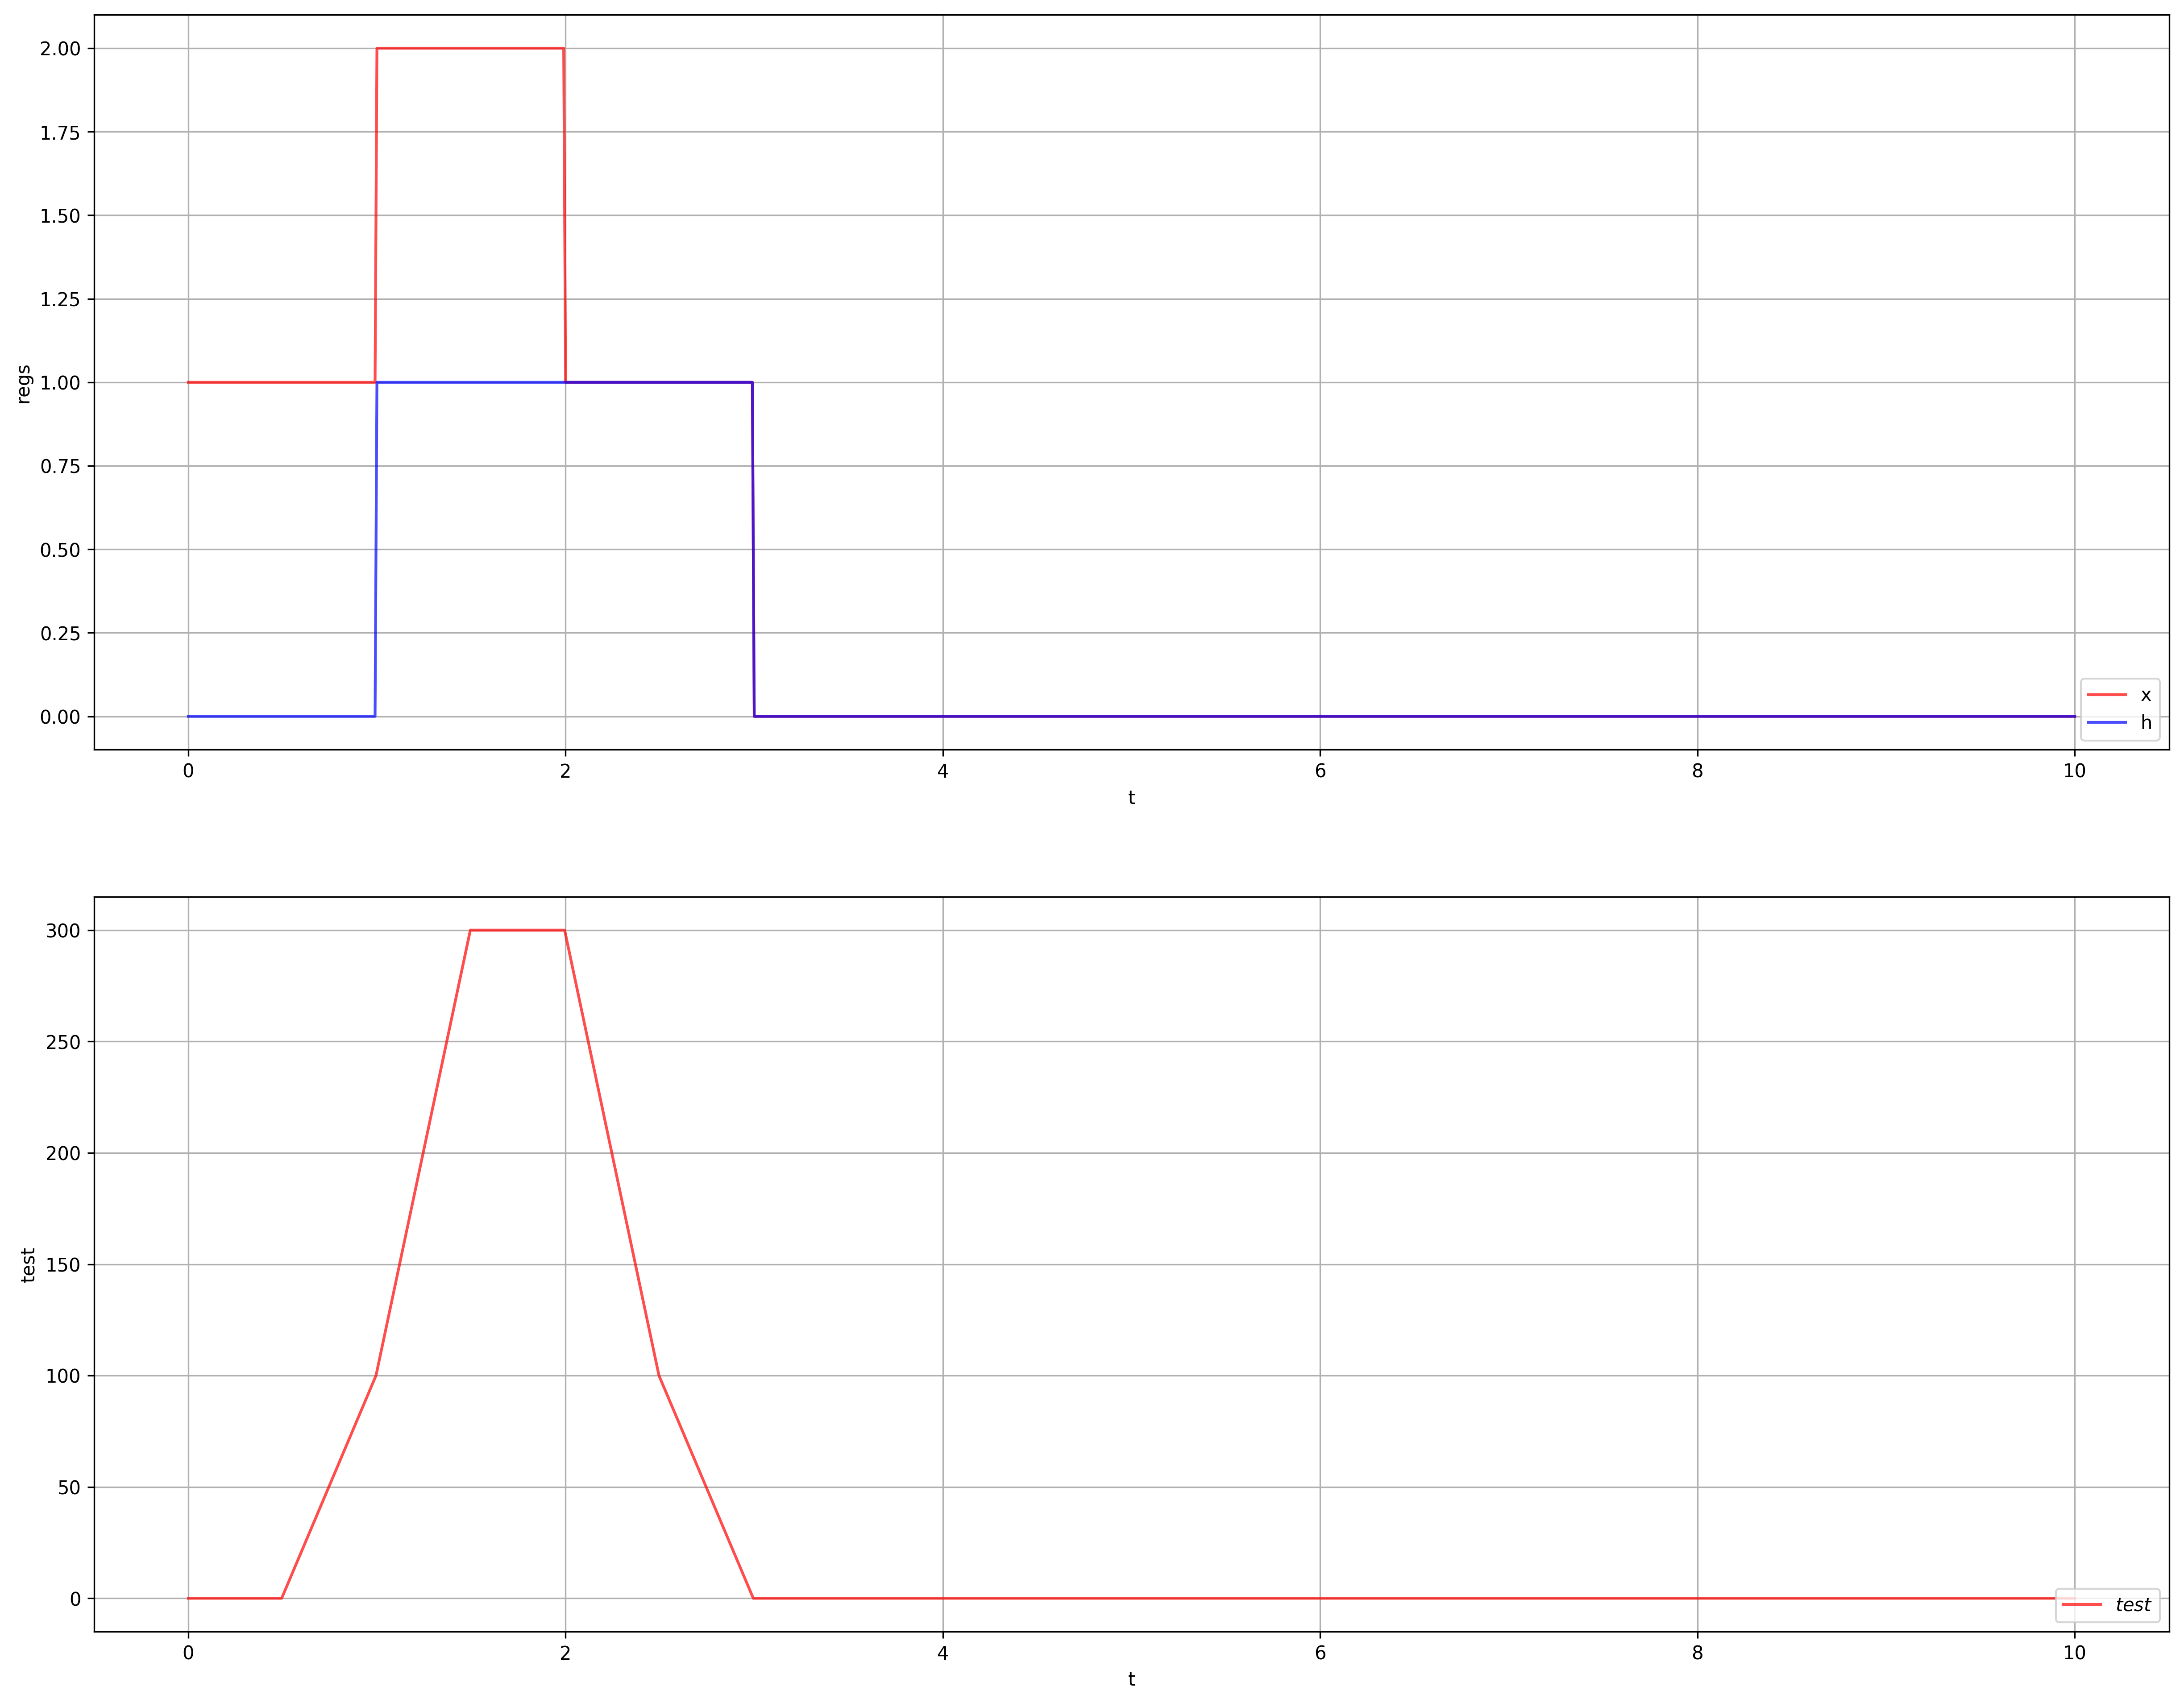

In [50]:
def x(t):
    return (u(t) + u(t, 1) - u(t, 2) - u(t, 3))

def h(t):
    return (u(t, 1) - u(t, 3))

step_size = 0.01
t_hw = np.arange(0, 10 + step_size, step_size)
x_hw = x(t_hw)
h_hw = h(t_hw)
conv_hw = conv(x_hw, h_hw, 1 / step_size)

conv_t_hw = np.arange(0, 10 + step_size / 2, step_size / 2)
# create_plot([conv_t_hw][:-1],
#             [(conv(x_hw, h_hw), )],
#             ['t'],
#             ['f_1(t) * f_2(t)'],
#             [('$f_1(t) * f_2(t)$', )], 1)

create_plot([t_hw, conv_t_hw[:len(conv_hw)]],
            [(x_hw, h_hw), (conv_hw, )],
            ['t', 't'],
            ['regs', 'test'],
            [('x', 'h'), ('$test$', )], 2)